In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs


In [2]:
# Generate sample data
np.random.seed(0)
# minibatch随机抽样100例样本进行训练
batch_size = 100
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
# 产生3个簇类的30000个样本数据
X, labels_true = make_blobs(n_samples=30000, centers=centers, cluster_std=0.7)

# k-means++算法
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0



# MiniBatchKMeans算法
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

# 打印k-means++运行时间和性能度量
print("k-means++_runtime= ",t_batch)
print("k_means++_metics= ",k_means.inertia_)
# 打印minibatch_k_means++运行时间和性能度量值
print("MiniBatch_k_means++_runtime= ",t_mini_batch)
print("k_means_metics= ",mbk.inertia_)


k-means++_runtime=  0.40218234062194824
k_means++_metics=  25164.97821695812
MiniBatch_k_means++_runtime=  0.10904812812805176
k_means_metics=  25178.611517320118


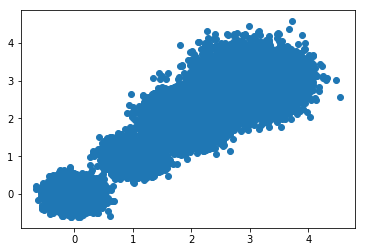

In [3]:
from sklearn import metrics
# 定义四个簇类中心
centers1 = [[0,0],[1, 1],[1.9, 2],[3, 3]]
# 定义每个簇类的标准差
std1 = [0.19,0.2,0.3,0.4]
# 算法可重复性
seed1 =45
# 产生4个簇类的30000个样本数据
X, labels_true = make_blobs(n_samples=30000, centers=centers1, cluster_std=std1,random_state=seed1)
plt.scatter(X[:,0],X[:,1],marker='o')
plt.show()

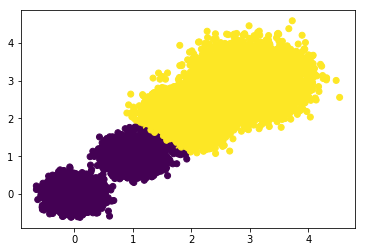

the Calinski-Harabasz scores(k=2) is:  85059.39875951338


In [4]:
# 若我们选择k=2
k_means = KMeans(init='k-means++', n_clusters=2, n_init=10,random_state=10)
y_pred = k_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
scores2 = metrics.calinski_harabaz_score(X,y_pred)
print("the Calinski-Harabasz scores(k=2) is: ",scores2)

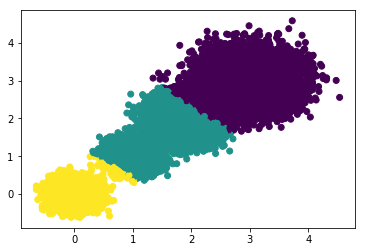

the Calinski-Harabasz scores(k=2) is:  92778.08155077342


In [5]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10,random_state=10)
y_pred = k_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
scores3 = metrics.calinski_harabaz_score(X,y_pred)
print("the Calinski-Harabasz scores(k=2) is: ",scores3)

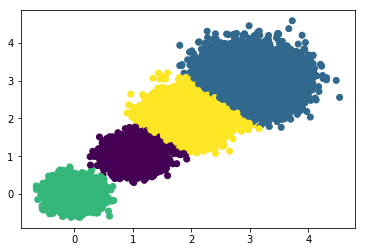

the Calinski-Harabasz scores(k=2) is:  158961.98176157777


In [6]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=10,random_state=10)
y_pred = k_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
scores4 = metrics.calinski_harabaz_score(X,y_pred)
print("the Calinski-Harabasz scores(k=2) is: ",scores4)

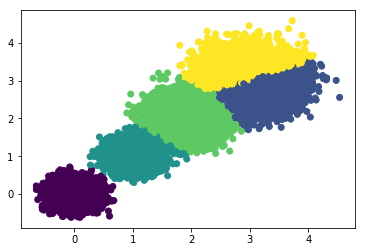

the Calinski-Harabasz scores(k=2) is:  142603.30676346243


In [7]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10,random_state=10)
y_pred = k_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()
scores5 = metrics.calinski_harabaz_score(X,y_pred)
print("the Calinski-Harabasz scores(k=2) is: ",scores5)

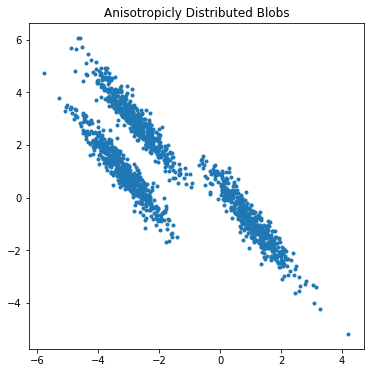

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(6, 6))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# 生成各项异性的数据
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], marker='.')
plt.title("Anisotropicly Distributed Blobs")

plt.show()

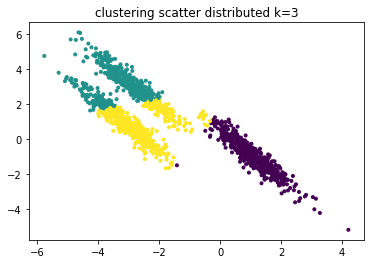

In [9]:
# k =3训练数据，输出散点效果图
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], marker='.',c=y_pred)
plt.title("clustering scatter distributed k=3")
plt.show()

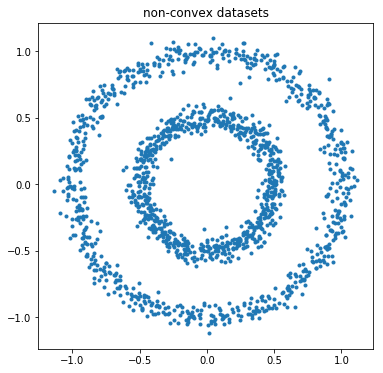

In [10]:
# 非凸数据集
plt.figure(figsize=[6,6])
from sklearn import cluster,datasets
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
plt.scatter(noisy_circles[0][:,0],noisy_circles[0][:,1],marker='.')
plt.title("non-convex datasets")
plt.show()

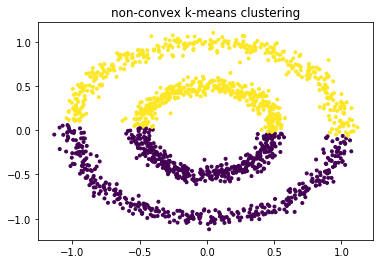

In [13]:
# k=2训练数据
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(noisy_circles[0])
plt.scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1], marker='.',c=y_pred)
plt.title("non-convex k-means clustering")
plt.show()

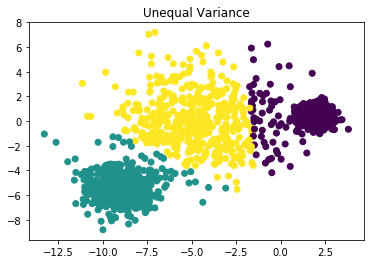

In [14]:
# 构建不同方差的各簇类数据，标准差分别为1.0,2.5,0.5
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")
plt.show()

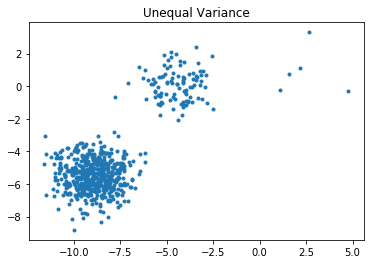

In [15]:
n_samples = 1500
random_state = 170
# 产生三个簇类，每个簇类样本数是500
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# 三个簇类的样本数分别为500,100,10，查看聚类效果
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:5]))
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], marker='.')
plt.title("Unequal Variance")
plt.show()

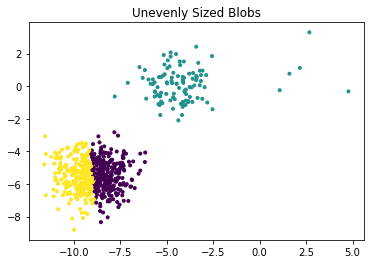

In [16]:
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred,marker='.')
plt.title("Unevenly Sized Blobs")

plt.show()

In [17]:
# 产生100维的15000个样本
n_samples = 15000
random_state = 170
plt.figure(figsize=[10,6])
t0=time.time()
# 产生三个簇类，每个簇类样本数是500
X, y = make_blobs(n_samples=n_samples, n_features=100,random_state=random_state)
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X)
t1 =time.time()-t0
scores1 = metrics.calinski_harabaz_score(X,y)
print("no feature dimonsion reduction scores = ",scores1)
print("no feature dimonsion reduction runtime = ",t1)

no feature dimonsion reduction scores =  164709.2183791984
no feature dimonsion reduction runtime =  0.6728250980377197


<Figure size 720x432 with 0 Axes>

In [18]:
# 数据先pca降维，再k-means聚类
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)
s=pca.fit_transform(X)
t0=time.time()
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(s)
t1 =time.time()-t0
print("feature dimonsion reduction scores = ",scores1)
print("feature dimonsion reduction runtime = ",t1)

feature dimonsion reduction scores =  164709.2183791984
feature dimonsion reduction runtime =  0.05086469650268555
